In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = '../data/raw_sales.csv'

pd.read_csv(path)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [164]:
raw = pd.read_csv(path, parse_dates=['datesold'])
# parse_dates=['datesold'] : 지정된 열을  날짜/시간 형식으로 자동 변환
# 변환된 'datesold' 

sales= raw.copy()

sales.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [165]:
sales.shape

(29580, 5)

In [166]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [167]:
# 연도만 추출

sales['datesold'].dt.year

0        2007
1        2007
2        2007
3        2007
4        2007
         ... 
29575    2019
29576    2019
29577    2019
29578    2019
29579    2019
Name: datesold, Length: 29580, dtype: int32

In [168]:
sales['year']= sales['datesold'].dt.year
# 연도만 추출 -> 새열 year 추가
sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [169]:
#연도별 평균가격
#    연도별 그룹     가격      의 평균
sales.groupby('year')['price'].agg("mean")

year
2007    522377.210884
2008    493814.162754
2009    496092.032959
2010    559564.810289
2011    566715.110227
2012    552501.369214
2013    553416.296838
2014    592653.761439
2015    626101.342654
2016    635185.311668
2017    671880.551420
2018    660701.042768
2019    634184.218773
Name: price, dtype: float64

In [170]:
round(sales.groupby('year')['price'].agg("mean"),1)

year
2007    522377.2
2008    493814.2
2009    496092.0
2010    559564.8
2011    566715.1
2012    552501.4
2013    553416.3
2014    592653.8
2015    626101.3
2016    635185.3
2017    671880.6
2018    660701.0
2019    634184.2
Name: price, dtype: float64

In [171]:
result = round(sales.groupby('year')['price'].agg("mean"),1)
result[:5]

year
2007    522377.2
2008    493814.2
2009    496092.0
2010    559564.8
2011    566715.1
Name: price, dtype: float64

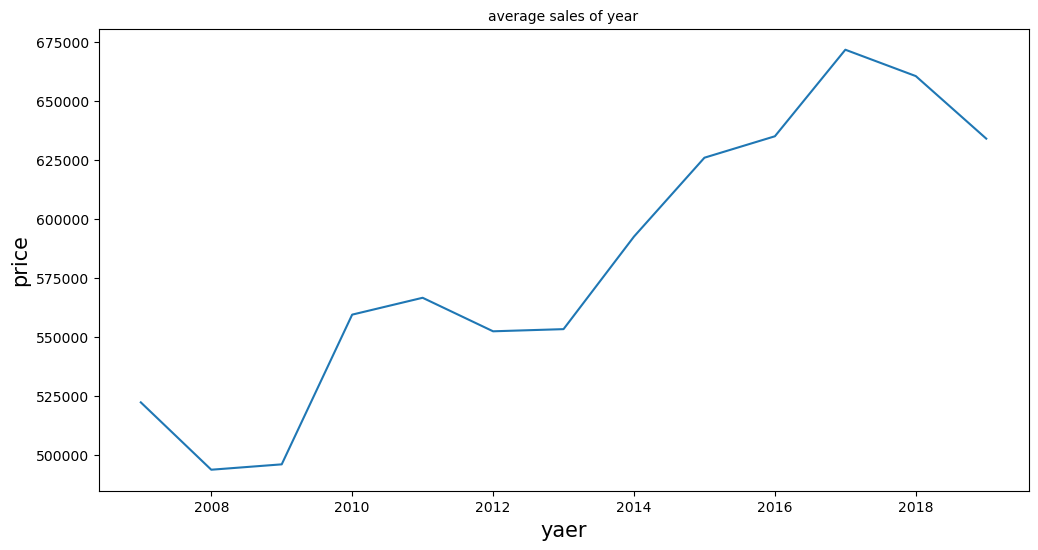

In [172]:
# 시간의 변동에 따른 추세를 보고싶어요
# 선 그래프(line graph)

fig, ax =plt.subplots(figsize=(12,6))

ax.plot(result.index,result.values)

ax.set_title( 'average sales of year', size = 10)
ax.set_xlabel('yaer', size= 15)
ax.set_ylabel('price', size= 15)

plt.savefig('../data/average price of year.png') # 그래프 저장 방법

plt.show()

In [173]:
# 막대 그래프(bar graph)

sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [184]:
# 월별 막대 그래프를 x축 기준
# 2007년도 2008년도 병립

sales['year'] =sales['datesold'].dt.year

In [177]:
sales['month'] = sales['datesold'].dt.month

In [183]:
sales.drop(columns=['yaer'], inplace=True)


In [181]:
sales.head(3)

,datesold,postcode,price,propertyType,bedrooms,yaer,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3


In [179]:
sales['year'].isin([2007,2008,2009])

0         True
1         True
2         True
3         True
4         True
         ...  
29575    False
29576    False
29577    False
29578    False
29579    False
Name: year, Length: 29580, dtype: bool

In [185]:
condition = sales['year'].isin([2007,2008,2009]) # year의 2007,2008,2009만 True로 나머진 False로 구분

sales.loc[condition, :]                            # True 인 친구들만 추출

,datesold,postcode,price,propertyType,bedrooms,month,year
0,2007-02-07,2607,525000,house,4,2,2007
1,2007-02-27,2906,290000,house,3,2,2007
2,2007-03-07,2905,328000,house,3,3,2007
3,2007-03-09,2905,380000,house,4,3,2007
4,2007-03-21,2906,310000,house,3,3,2007
...,...,...,...,...,...,...,...
24802,2009-12-22,2606,335000,unit,2,12,2009
24803,2009-12-22,2606,350000,unit,2,12,2009
24804,2009-12-23,2603,330000,unit,1,12,2009
24805,2009-12-24,2606,366000,unit,2,12,2009


In [186]:
df_condition = sales.loc[condition, :]  
df_condition.tail()

,datesold,postcode,price,propertyType,bedrooms,month,year
24802,2009-12-22,2606,335000,unit,2,12,2009
24803,2009-12-22,2606,350000,unit,2,12,2009
24804,2009-12-23,2603,330000,unit,1,12,2009
24805,2009-12-24,2606,366000,unit,2,12,2009
24806,2009-12-24,2617,367000,unit,2,12,2009


In [187]:
#연도별, 월별 평균 가격을 알고싶어요

result = round(df_condition.groupby(['year','month'])['price'].agg('mean'),1)
result

year  month
2007  2        407500.0
      3        339333.3
      4        798000.0
      5        339500.0
      6        520333.3
      7        592078.9
      8        505608.7
      9        556875.0
      10       498600.0
      11       505442.3
      12       505737.0
2008  1        504428.6
      2        531080.0
      3        563500.0
      4        534204.5
      5        522394.7
      6        539092.6
      7        537453.1
      8        449510.4
      9        496778.7
      10       454822.0
      11       489546.3
      12       494410.8
2009  1        482238.6
      2        459281.6
      3        493931.2
      4        497882.6
      5        477808.7
      6        479053.2
      7        495982.1
      8        485465.9
      9        499597.2
      10       501456.3
      11       546882.3
      12       524921.4
Name: price, dtype: float64

In [188]:
result.index

MultiIndex([(2007,  2),
            (2007,  3),
            (2007,  4),
            (2007,  5),
            (2007,  6),
            (2007,  7),
            (2007,  8),
            (2007,  9),
            (2007, 10),
            (2007, 11),
            (2007, 12),
            (2008,  1),
            (2008,  2),
            (2008,  3),
            (2008,  4),
            (2008,  5),
            (2008,  6),
            (2008,  7),
            (2008,  8),
            (2008,  9),
            (2008, 10),
            (2008, 11),
            (2008, 12),
            (2009,  1),
            (2009,  2),
            (2009,  3),
            (2009,  4),
            (2009,  5),
            (2009,  6),
            (2009,  7),
            (2009,  8),
            (2009,  9),
            (2009, 10),
            (2009, 11),
            (2009, 12)],
           names=['year', 'month'])

In [145]:
result.reset_index().iloc[::3, :]

,year,month,price
0,2007,2,407500.0
3,2007,5,339500.0
6,2007,8,505608.7
9,2007,11,505442.3
12,2008,2,531080.0
15,2008,5,522394.7
18,2008,8,449510.4
21,2008,11,489546.3
24,2009,2,459281.6
27,2009,5,477808.7


In [190]:
result = result.reset_index()
result.head()

,year,month,price
0,2007,2,407500.0
1,2007,3,339333.3
2,2007,4,798000.0
3,2007,5,339500.0
4,2007,6,520333.3


In [191]:
result['year']

0     2007
1     2007
2     2007
3     2007
4     2007
5     2007
6     2007
7     2007
8     2007
9     2007
10    2007
11    2008
12    2008
13    2008
14    2008
15    2008
16    2008
17    2008
18    2008
19    2008
20    2008
21    2008
22    2008
23    2009
24    2009
25    2009
26    2009
27    2009
28    2009
29    2009
30    2009
31    2009
32    2009
33    2009
34    2009
Name: year, dtype: int32

In [192]:
result['year'].unique()

array([2007, 2008, 2009])

In [193]:
result.loc[result['year']== 2007, :]

,year,month,price
0,2007,2,407500.0
1,2007,3,339333.3
2,2007,4,798000.0
3,2007,5,339500.0
4,2007,6,520333.3
5,2007,7,592078.9
6,2007,8,505608.7
7,2007,9,556875.0
8,2007,10,498600.0
9,2007,11,505442.3


In [194]:
result_2007 = result.loc[result['year']== 2007, :]
result_2008 = result.loc[result['year']== 2008, :]
result_2009 = result.loc[result['year']== 2009, :]

print(result_2007[:3])
print()
print(result_2008[:3])
print()
print(result_2009[:3])

   year  month     price
0  2007      2  407500.0
1  2007      3  339333.3
2  2007      4  798000.0

    year  month     price
11  2008      1  504428.6
12  2008      2  531080.0
13  2008      3  563500.0

    year  month     price
23  2009      1  482238.6
24  2009      2  459281.6
25  2009      3  493931.2


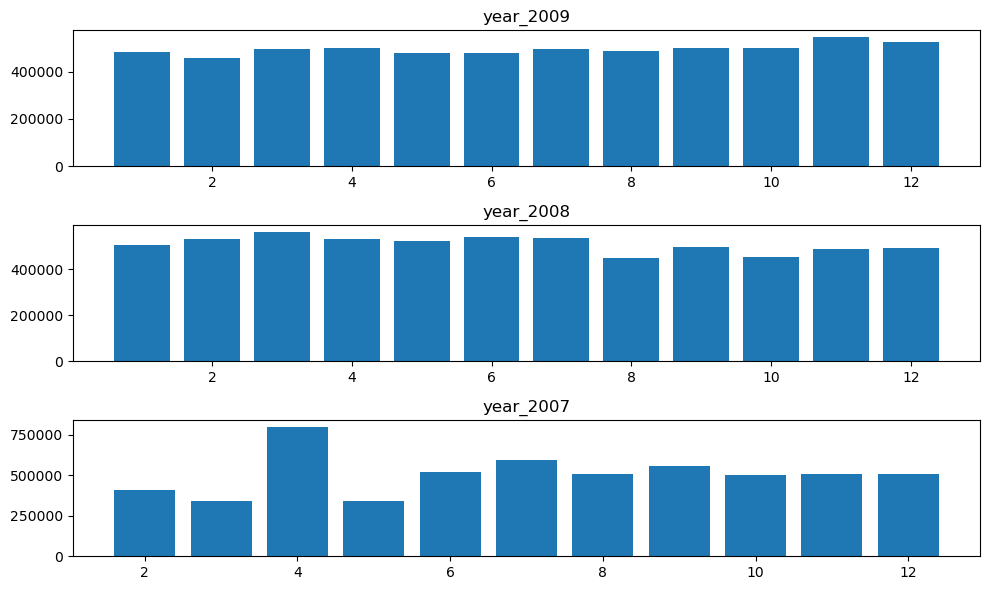

In [195]:
fig, ax = plt.subplots(nrows = 3 , ncols= 1, figsize=(10,6))

ax[0].bar(result_2009['month'],result_2009['price'])
ax[0].set_title('year_2009')


ax[1].bar(result_2008['month'],result_2008['price'])
ax[1].set_title('year_2008')


ax[2].bar(result_2007['month'],result_2007['price'])
ax[2].set_title('year_2007')

plt.tight_layout() #자동으로 레이아웃 조절
plt.show()


In [196]:
len(result['year'].unique())

3

In [197]:
type(len(result['year'].unique()))

int

0 2007
1 2008
2 2009


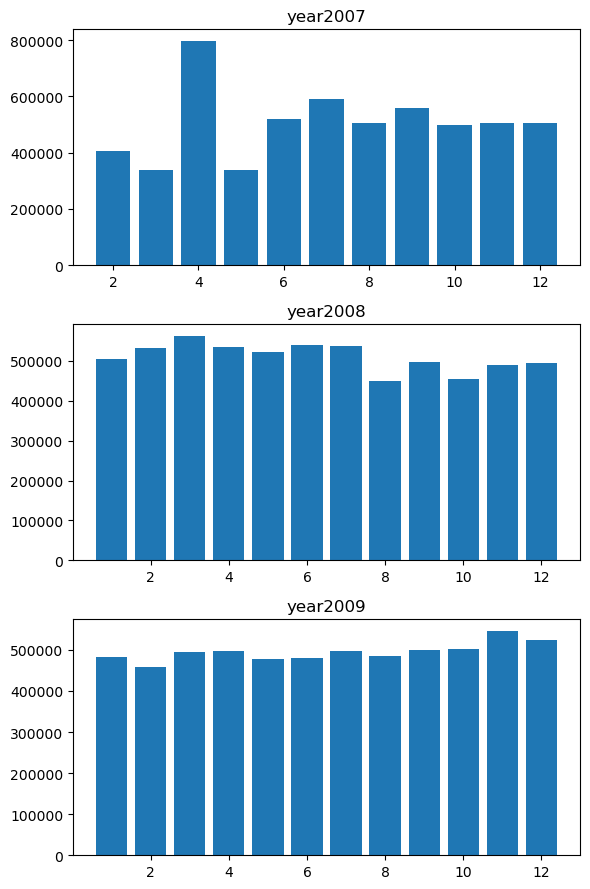

In [198]:
N= int(len(result['year'].unique()))

fig, ax = plt.subplots(nrows=N,ncols= 1, figsize = (6, 3*N))

for i,y in enumerate(result['year'].unique()):
    print(i,y)
    
    data = result.loc[result['year']==y]
    
    ax[i].bar(data['month'],data['price'])
    ax[i].set_title(f'year{y}')


plt.tight_layout()

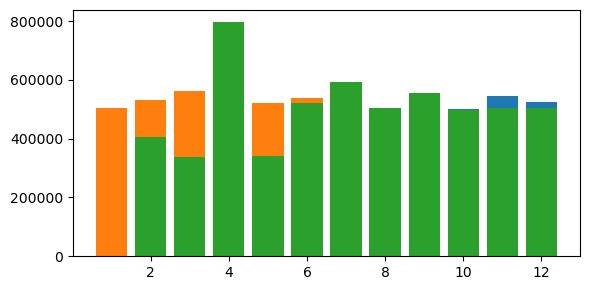

In [199]:
fig, ax = plt.subplots(figsize=(6,3))

ax.bar(result_2009['month'],result_2009['price'])
ax.bar(result_2008['month'],result_2008['price'])
ax.bar(result_2007['month'],result_2007['price'])

plt.tight_layout()

plt.show()

Seabron - sns

In [200]:
import pandas as pd
import seaborn as sns

sales

,datesold,postcode,price,propertyType,bedrooms,month,year
0,2007-02-07,2607,525000,house,4,2,2007
1,2007-02-27,2906,290000,house,3,2,2007
2,2007-03-07,2905,328000,house,3,3,2007
3,2007-03-09,2905,380000,house,4,3,2007
4,2007-03-21,2906,310000,house,3,3,2007
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,7,2019
29576,2019-07-25,2612,560000,unit,2,7,2019
29577,2019-07-26,2912,464950,unit,2,7,2019
29578,2019-07-26,2601,589000,unit,2,7,2019


c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Price')

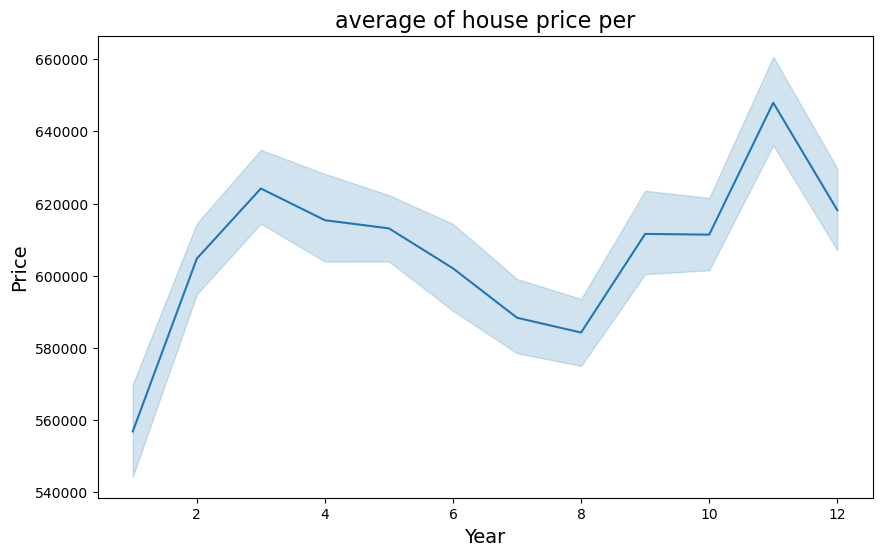

In [201]:
fig,ax = plt.subplots(figsize=(10,6))

sns.lineplot(data= sales, x = 'month', y = 'price',ax=ax)
ax.set_title('average of house price per',size = 16)
ax.set_xlabel('Year',size=14)
ax.set_ylabel('Price',size=14)


In [202]:
# barplt , outlier  이상치 제거

print(sales.head())
print(sales.tail())

    datesold  postcode   price propertyType  bedrooms  month  year
0 2007-02-07      2607  525000        house         4      2  2007
1 2007-02-27      2906  290000        house         3      2  2007
2 2007-03-07      2905  328000        house         3      3  2007
3 2007-03-09      2905  380000        house         4      3  2007
4 2007-03-21      2906  310000        house         3      3  2007
        datesold  postcode   price propertyType  bedrooms  month  year
29575 2019-07-25      2900  500000         unit         3      7  2019
29576 2019-07-25      2612  560000         unit         2      7  2019
29577 2019-07-26      2912  464950         unit         2      7  2019
29578 2019-07-26      2601  589000         unit         2      7  2019
29579 2019-07-26      2612  775000         unit         2      7  2019


In [205]:
sales['year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

In [207]:
df = sales.copy()
df['year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

In [208]:
condition = sales['year'].isin([2007,2008,2009,2010])

In [213]:
df= df.loc[condition,:]

df[:5]

,datesold,postcode,price,propertyType,bedrooms,month,year
0,2007-02-07,2607,525000,house,4,2,2007
1,2007-02-27,2906,290000,house,3,2,2007
2,2007-03-07,2905,328000,house,3,3,2007
3,2007-03-09,2905,380000,house,4,3,2007
4,2007-03-21,2906,310000,house,3,3,2007


In [210]:
df.loc[df_condition,:]

ValueError: Cannot index with multidimensional key

In [214]:
df.tail()

,datesold,postcode,price,propertyType,bedrooms,month,year
24983,2010-12-15,2612,415000,unit,1,12,2010
24984,2010-12-20,2905,350000,unit,2,12,2010
24985,2010-12-21,2612,640000,unit,2,12,2010
24986,2010-12-24,2606,300000,unit,1,12,2010
24987,2010-12-30,2602,389000,unit,2,12,2010


<Axes: xlabel='year', ylabel='price'>

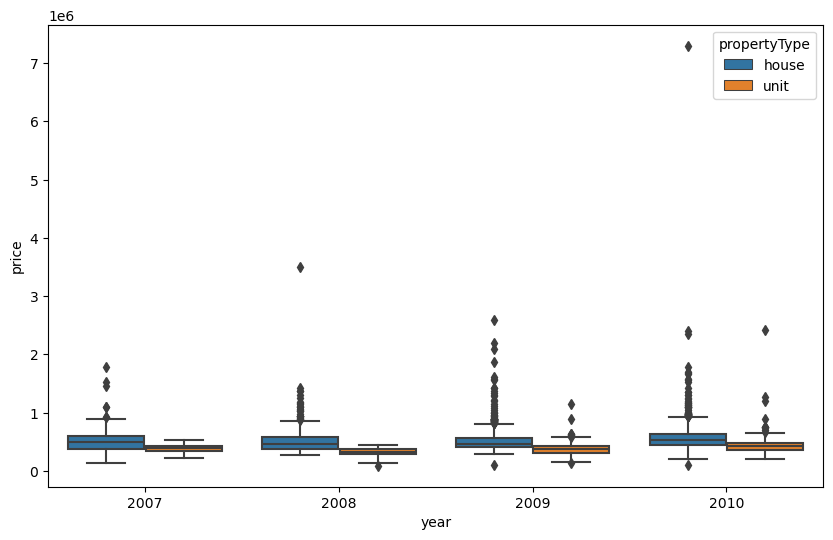

In [215]:
fig,ax = plt.subplots(figsize=(10,6))

sns.boxplot(data= df, x='year',y = 'price',hue = 'propertyType',ax=ax)
                                            #색상 = propertyType 별로 구분

In [3]:
# boxplot 개념

dat = {'values' : [10,12,12,13,12,11,14,13,15,102,120,12,18,14,14,17,18,19,20]}
date = {'values' : [10,12,12,13,12,11,14,13,15,102,120,12,18,14,14,17,18,19,20]}

temp_df = pd.DataFrame(dat)
temp = pd.DataFrame(date)

temp_df[:5]

,values
0,10
1,12
2,12
3,13
4,12


In [ ]:
# 1단계 : 사분위수 (Q1, Q3 ,Q2 = median, IQR)

Q1 = temp_df['values'].quantile(0.25)
Q3 = temp_df['values'].quantile(0.75)

IQR = Q3 - Q1

print(Q1)
print()
print(Q3)
print()
print(IQR)

12.0

18.0

6.0


In [ ]:
# 2단계: 이상치 임계값(threshold) 설정

lower_bound = Q1 -1.5*IQR  #하한가
upper_bound = Q3 +1.5*IQR  #상한가

print(lower_bound)
print()
print(upper_bound)

3.0

27.0


In [ ]:
condition = (temp_df['values'] <lower_bound) | (temp_df['values'] > upper_bound)

In [ ]:
# 3단계: 이상치 확인

outlier = temp_df.loc[condition,:]

In [216]:
# 4단계 : 이상치 처리(제거, upper_bound, lower_bound로 편입)

# 1) 이상치  제거  -> 함수 remove_outlier
df_clean = temp_df.loc[~condition,:]        # ~condtion  제거

print(df_clean)

Empty DataFrame
Columns: [values]
Index: []


In [219]:
temp_df.iloc[10,1] = 120

temp_upper = temp_df.copy()

IndexError: iloc cannot enlarge its target object

In [ ]:
# 2) bound에 편입
# 2-1 ) upper_bound에 편입

temp_df['values'] = temp_df['values'].apply(lambda x: min(x,upper_bound))

temp_df

,values
0,10.0
1,12.0
2,12.0
3,13.0
4,12.0
5,11.0
6,14.0
7,13.0
8,15.0
9,27.0


In [6]:
# 이상치 처리 함수 만들기

def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5*IQR  #하한가
    upper_bound = Q3 +1.5*IQR  #상한가
    
    
    condition = (df[column] <lower_bound) | (df[column] > upper_bound)
    
    outliers = df.loc[condition,:]
    temp_clean = df.loc[~condition,:].reset_index(drop=True)        # ~condtion  제거
    
    return temp_clean, outliers
    


In [4]:
temp

,values
0,10
1,12
2,12
3,13
4,12
5,11
6,14
7,13
8,15
9,102


In [8]:
temp_1 =remove_outliers(temp,'values')

In [228]:
print(df.index)

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       24978, 24979, 24980, 24981, 24982, 24983, 24984, 24985, 24986, 24987],
      dtype='int64', length=3767)


In [231]:
df

,datesold,postcode,price,propertyType,bedrooms,month,year
0,2007-02-07,2607,525000,house,4,2,2007
1,2007-02-27,2906,290000,house,3,2,2007
2,2007-03-07,2905,328000,house,3,3,2007
3,2007-03-09,2905,380000,house,4,3,2007
4,2007-03-21,2906,310000,house,3,3,2007
...,...,...,...,...,...,...,...
24983,2010-12-15,2612,415000,unit,1,12,2010
24984,2010-12-20,2905,350000,unit,2,12,2010
24985,2010-12-21,2612,640000,unit,2,12,2010
24986,2010-12-24,2606,300000,unit,1,12,2010


In [234]:
remove_outliers(df,'price')

(       datesold  postcode   price propertyType  bedrooms  month  year
 0    2007-02-07      2607  525000        house         4      2  2007
 1    2007-02-27      2906  290000        house         3      2  2007
 2    2007-03-07      2905  328000        house         3      3  2007
 3    2007-03-09      2905  380000        house         4      3  2007
 4    2007-03-21      2906  310000        house         3      3  2007
 ...         ...       ...     ...          ...       ...    ...   ...
 3576 2010-12-15      2612  415000         unit         1     12  2010
 3577 2010-12-20      2905  350000         unit         2     12  2010
 3578 2010-12-21      2612  640000         unit         2     12  2010
 3579 2010-12-24      2606  300000         unit         1     12  2010
 3580 2010-12-30      2602  389000         unit         2     12  2010
 
 [3581 rows x 7 columns],
         datesold  postcode    price propertyType  bedrooms  month  year
 7     2007-04-30      2606  1530000        hou

In [235]:
df_clean,outliers = remove_outliers(df,'price')

print(df_clean)

       datesold  postcode   price propertyType  bedrooms  month  year
0    2007-02-07      2607  525000        house         4      2  2007
1    2007-02-27      2906  290000        house         3      2  2007
2    2007-03-07      2905  328000        house         3      3  2007
3    2007-03-09      2905  380000        house         4      3  2007
4    2007-03-21      2906  310000        house         3      3  2007
...         ...       ...     ...          ...       ...    ...   ...
3576 2010-12-15      2612  415000         unit         1     12  2010
3577 2010-12-20      2905  350000         unit         2     12  2010
3578 2010-12-21      2612  640000         unit         2     12  2010
3579 2010-12-24      2606  300000         unit         1     12  2010
3580 2010-12-30      2602  389000         unit         2     12  2010

[3581 rows x 7 columns]


In [236]:
print(outliers)

        datesold  postcode    price propertyType  bedrooms  month  year
7     2007-04-30      2606  1530000        house         4      4  2007
18    2007-07-07      2602   900000        house         4      7  2007
26    2007-07-21      2603  1780000        house         4      7  2007
60    2007-09-21      2603  1460000        house         5      9  2007
64    2007-09-24      2612   920000        house         4      9  2007
...          ...       ...      ...          ...       ...    ...   ...
24769 2009-10-22      2604   890000         unit         2     10  2009
24812 2010-01-22      2604  2425000         unit         3      1  2010
24843 2010-03-19      2604  1200000         unit         2      3  2010
24965 2010-10-29      2600  1275000         unit         3     10  2010
24974 2010-11-27      2604   890000         unit         3     11  2010

[186 rows x 7 columns]


c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

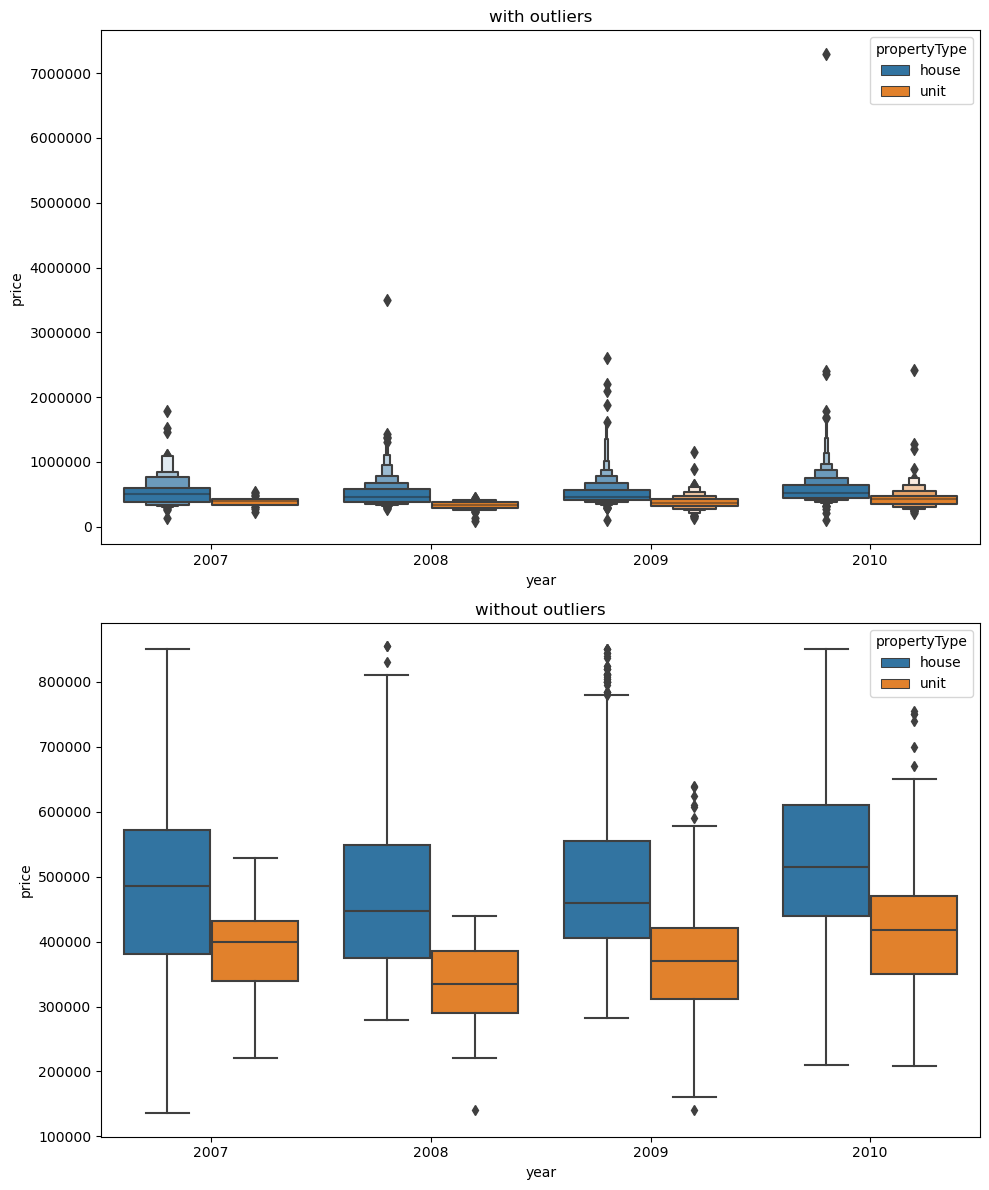

In [243]:
# 2007 ~ 2010 추출 결과 데이터 시각화

from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)
# 과학적 표기법 비활성화 설정

fig, ax =plt. subplots(nrows=2, figsize=(10,12))
sns.boxenplot(data= df, x = 'year', y ='price',hue = 'propertyType', ax=ax[0])
ax[0].set_title('with outliers')
ax[0].yaxis.set_major_formatter(formatter)

sns.boxplot(data=df_clean, x = 'year', y = 'price', hue = 'propertyType', ax=ax[1])
ax[1].set_title('without outliers')


plt.tight_layout()
plt.show()